In [17]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
df = pd.read_csv('service_level_erlangs.csv')


In [3]:
df['intercept'] = 1
independent_variables = df[['Service_Level_Actual', 'intercept']]


In [4]:
model_occupancy = sm.OLS(df['Occupancy_Actual'], independent_variables)
results_occupancy = model_occupancy.fit()
print(results_occupancy.summary())


                            OLS Regression Results                            
Dep. Variable:       Occupancy_Actual   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                 4.106e+04
Date:                Tue, 01 Aug 2023   Prob (F-statistic):               0.00
Time:                        12:22:38   Log-Likelihood:                 34783.
No. Observations:              581370   AIC:                        -6.956e+04
Df Residuals:                  581368   BIC:                        -6.954e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Service_Level_Actual     0.3726 

In [5]:
model_waiting = sm.OLS(df['Waiting_Probablility_Actual'], independent_variables)
results_waiting = model_waiting.fit()
print(results_waiting.summary())


                                 OLS Regression Results                                
Dep. Variable:     Waiting_Probablility_Actual   R-squared:                       0.016
Model:                                     OLS   Adj. R-squared:                  0.016
Method:                          Least Squares   F-statistic:                     9393.
Date:                         Tue, 01 Aug 2023   Prob (F-statistic):               0.00
Time:                                 12:22:38   Log-Likelihood:             4.1254e+05
No. Observations:                       581370   AIC:                        -8.251e+05
Df Residuals:                           581368   BIC:                        -8.251e+05
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [6]:
import statsmodels.formula.api as smf

# Assuming "df" is your DataFrame
model = smf.ols(formula="Waiting_Probablility_Actual ~ Actual_CV + Actual_AHT + Actual_Required_FTE + Service_Level_Actual + Occupancy_Actual", data=df)
results_waiting_multi = model.fit()

# Print out the statistics
print(results_waiting_multi.summary())


                                 OLS Regression Results                                
Dep. Variable:     Waiting_Probablility_Actual   R-squared:                       0.788
Model:                                     OLS   Adj. R-squared:                  0.788
Method:                          Least Squares   F-statistic:                 4.322e+05
Date:                         Tue, 01 Aug 2023   Prob (F-statistic):               0.00
Time:                                 12:22:39   Log-Likelihood:             8.5880e+05
No. Observations:                       581370   AIC:                        -1.718e+06
Df Residuals:                           581364   BIC:                        -1.718e+06
Df Model:                                    5                                         
Covariance Type:                     nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [7]:
# Assuming "df" is your DataFrame
model = smf.ols(formula="Occupancy_Actual ~ Actual_CV + Actual_AHT + Actual_Required_FTE + Service_Level_Actual + Waiting_Probablility_Actual", data=df)
results_occupancy_multi = model.fit()

# Print out the statistics
print(results_occupancy_multi.summary())


                            OLS Regression Results                            
Dep. Variable:       Occupancy_Actual   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                 7.183e+05
Date:                Tue, 01 Aug 2023   Prob (F-statistic):               0.00
Time:                        12:22:39   Log-Likelihood:             5.8788e+05
No. Observations:              581370   AIC:                        -1.176e+06
Df Residuals:                  581364   BIC:                        -1.176e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [8]:
# Assuming "df" is your DataFrame
model = smf.ols(formula="Service_Level_Actual ~ Actual_CV + Actual_AHT + Actual_Required_FTE + Occupancy_Actual + Waiting_Probablility_Actual", data=df)
results_sl_multi = model.fit()

# Print out the statistics
print(results_sl_multi.summary())

                             OLS Regression Results                             
Dep. Variable:     Service_Level_Actual   R-squared:                       0.184
Model:                              OLS   Adj. R-squared:                  0.184
Method:                   Least Squares   F-statistic:                 2.629e+04
Date:                  Tue, 01 Aug 2023   Prob (F-statistic):               0.00
Time:                          12:22:40   Log-Likelihood:             2.9044e+05
No. Observations:                581370   AIC:                        -5.809e+05
Df Residuals:                    581364   BIC:                        -5.808e+05
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

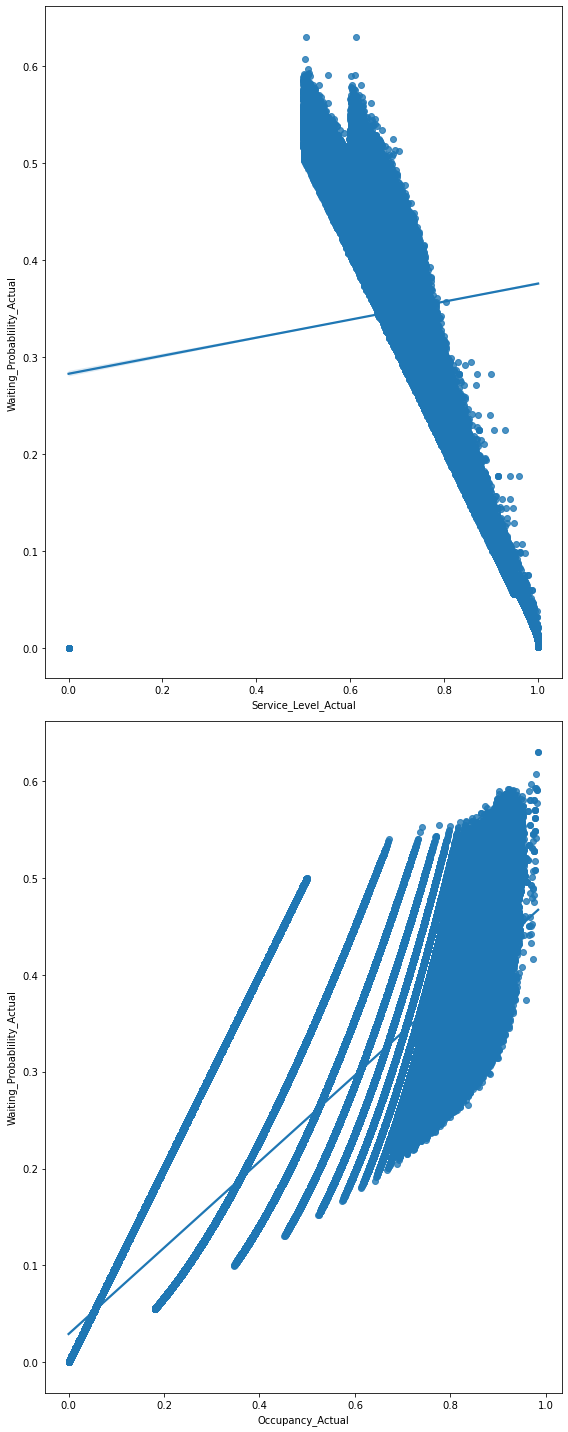

In [18]:
# independent variables
independent_vars = ["Service_Level_Actual", "Occupancy_Actual"]

# Scatterplots with regression lines
fig, axs = plt.subplots(len(independent_vars), figsize=(8, 20))

for var, ax in zip(independent_vars, axs):
    sns.regplot(data=df, x=var, y="Waiting_Probablility_Actual", ax=ax)

plt.tight_layout()
# Save the plot to the 'visualizations' folder
chart_path = os.path.join('visualizations', 'waiting_sl_occupancy.png')
plt.savefig(chart_path)
plt.show()

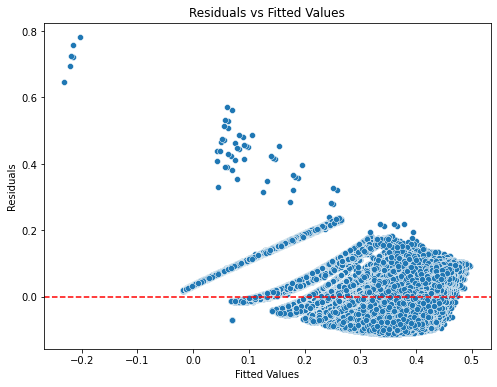

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the fitted values
df['Fitted_Values'] = results_waiting_multi.fittedvalues

# Compute the residuals
df['Residuals'] = results_waiting_multi.resid

# Create the plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Fitted_Values', y='Residuals', data=df)

# Draw a horizontal line at y = 0
plt.axhline(y=0, color='r', linestyle='--')

# Set the labels and title
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")

# Show the plot
plt.show()


In [10]:
X = df['Actual_AHT']  # independent variable
y = df['Actual_Required_FTE']  # dependent variable

# Add a constant to the independent variable
X = sm.add_constant(X)

# Run the regression
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())


                             OLS Regression Results                            
Dep. Variable:     Actual_Required_FTE   R-squared:                       0.088
Model:                             OLS   Adj. R-squared:                  0.088
Method:                  Least Squares   F-statistic:                 5.632e+04
Date:                 Tue, 01 Aug 2023   Prob (F-statistic):               0.00
Time:                         12:28:52   Log-Likelihood:            -2.3386e+06
No. Observations:               581370   AIC:                         4.677e+06
Df Residuals:                   581368   BIC:                         4.677e+06
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.0114      0.037    243.31

In [11]:
# Create your independent variables dataframe
X = df[['Actual_CV', 'Actual_AHT']]

# Add a constant (intercept term) to the independent variables
X = sm.add_constant(X)

# Create your dependent variable series
y = df['Actual_Required_FTE']

# Create the model
model = sm.OLS(y, X)

# Fit the model
results = model.fit()

# Print the results
print(results.summary())


                             OLS Regression Results                            
Dep. Variable:     Actual_Required_FTE   R-squared:                       0.845
Model:                             OLS   Adj. R-squared:                  0.845
Method:                  Least Squares   F-statistic:                 1.588e+06
Date:                 Tue, 01 Aug 2023   Prob (F-statistic):               0.00
Time:                         12:28:53   Log-Likelihood:            -1.8230e+06
No. Observations:               581370   AIC:                         3.646e+06
Df Residuals:                   581367   BIC:                         3.646e+06
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.3649      0.017   -253.82

In [12]:
df['Workload_Minutes'] = df['Actual_CV'] * df['Actual_AHT'] / 60

In [13]:
X = df['Workload_Minutes']  # independent variable
y = df['Actual_Required_FTE']  # dependent variable

# Add a constant to the independent variable
X = sm.add_constant(X)

# Run the regression
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     Actual_Required_FTE   R-squared:                       0.998
Model:                             OLS   Adj. R-squared:                  0.998
Method:                  Least Squares   F-statistic:                 2.496e+08
Date:                 Tue, 01 Aug 2023   Prob (F-statistic):               0.00
Time:                         12:28:53   Log-Likelihood:            -6.0255e+05
No. Observations:               581370   AIC:                         1.205e+06
Df Residuals:                   581368   BIC:                         1.205e+06
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.1242   